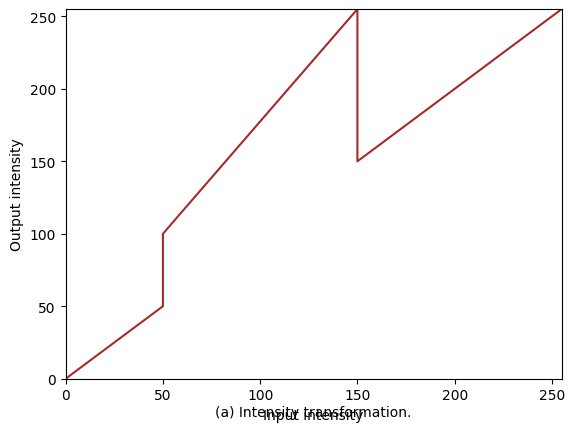

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the control points for the transformation
control_points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Extract x and y coordinates from the control points
x = control_points[:, 0]
y = control_points[:, 1]

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(x, y, color='brown')  # Brown color as shown in the image

# Set axis labels
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')

# Set axis limits
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)

# Add title or caption (optional)
ax.text(0.5, -0.1, "(a) Intensity transformation.", ha='center', transform=ax.transAxes)

# Show the plot
plt.show()


Transform length: 256


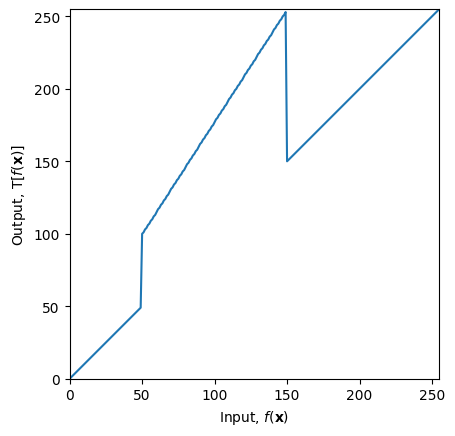

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow("Original Image", img_orig)
cv.waitKey(0)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Show transformed image
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()